In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions

dir = "../../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

Calculating the maximum number of cars that can be in the network at the same time

In [8]:
SquareNet, position_array, dist_matrix = SquareDiGraph(5, doble_sentido=false);

In [11]:
total = 0
for edge in edges(SquareNet)
    total += dist_matrix[src(edge),dst(edge)]
end

print("This is the max number that can be at the same time in the 5x5 network: ", total./5)

This is the max number that can be at the same time in the 5x5 network: 416.0

# Plots for analysis

In [12]:
simulations_path = "../../simulaciones-cluster/un-sentido/sin-diagonal/redsize5/"


"../../simulaciones-cluster/un-sentido/sin-diagonal/redsize5/"

## Read a single file

In [14]:
reads=CSV.read(simulations_path*"nautos1000/1/Datos-RS5-N1000-R1.csv",DataFrame);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/time_repetition1.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/time_repetition1.gif")
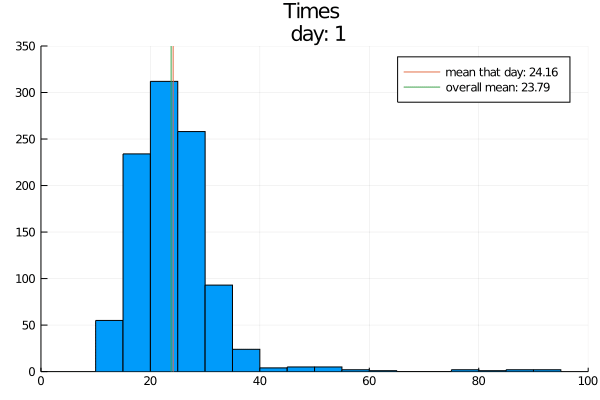

In [66]:
# Get daily times and daily means
daily_times = [parse.(Float64, split(chop(reads.times[i]; head=1, tail=1), ", ")) for i in 1:50];
daily_mean_times = [mean(daily_times[i]) for i in 1:50];

anim = @animate for i in 1:50
    histogram(daily_times[i],nbins=20,title = "Times \n day: "*string(i), label="")
    xlims!(0.0, 100.0)
    ylims!(0.0, 350.0)
    vline!([daily_mean_times[i]], label = "mean that day: "*string(round(daily_mean_times[i],digits=2)))
    vline!([mean(daily_mean_times)], label = "overall mean: "*string(round(mean(daily_mean_times),digits=2)))
end

gif(anim, "../../gifs/time_repetition1.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/speed_repetition1.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/speed_repetition1.gif")
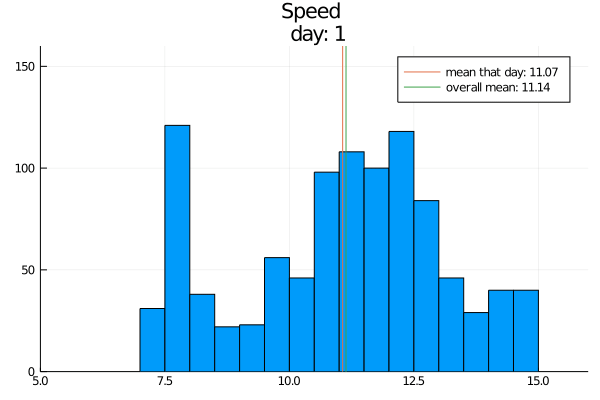

In [67]:
# Get daily speeds and daily means
daily_speeds = [parse.(Float64, split(chop(reads.speeds[i]; head=1, tail=1), ", ")) for i in 1:50];
daily_mean_speeds = [mean(daily_speeds[i]) for i in 1:50];

anim = @animate for i in 1:50
    histogram(daily_speeds[i],nbins=20,title = "Speed \n day: "*string(i), label="")
    xlims!(5.0, 16.0)
    ylims!(0.0, 160.0)
    vline!([daily_mean_speeds[i]], label = "mean that day: "*string(round(daily_mean_speeds[i],digits=2)))
    vline!([mean(daily_mean_speeds)], label = "overall mean: "*string(round(mean(daily_mean_speeds),digits=2)))
end

gif(anim, "../../gifs/speed_repetition1.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_repetition1.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_repetition1.gif")
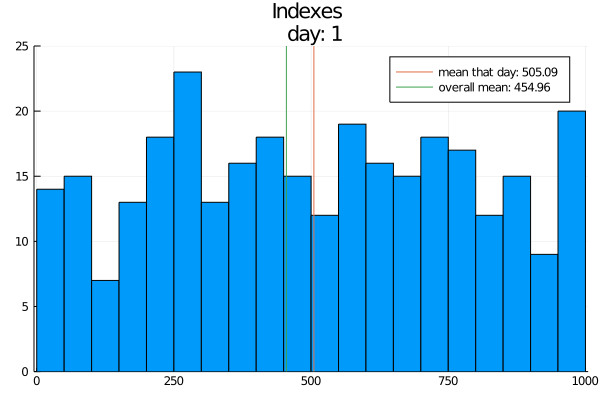

In [68]:
# Get daily indexes and daily means
daily_indexes = [parse.(Float64, split(chop(reads.indexes[i]; head=4, tail=1), ", ")) for i in 1:50];
daily_mean_indexes = [mean(daily_indexes[i]) for i in 1:50];

anim = @animate for i in 1:50
    histogram(daily_indexes[i],nbins=20,title = "Indexes \n day: "*string(i), label="")
    xlims!(-5.0, 1005.0)
    ylims!(0.0, 25.0)
    vline!([daily_mean_indexes[i]], label = "mean that day: "*string(round(daily_mean_indexes[i],digits=2)))
    vline!([mean(daily_mean_indexes)], label = "overall mean: "*string(round(mean(daily_mean_indexes),digits=2)))
end

gif(anim, "../../gifs/indexes_repetition1.gif", fps = 2)

## Read a the results of a number of cars

In [44]:
reads_1000 = [CSV.read(simulations_path*"nautos1000/"*string(i)*"/Datos-RS5-N1000-R"*string(i)*".csv",DataFrame) for i in 1:10];

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/time_1000cars.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/time_1000cars.gif")
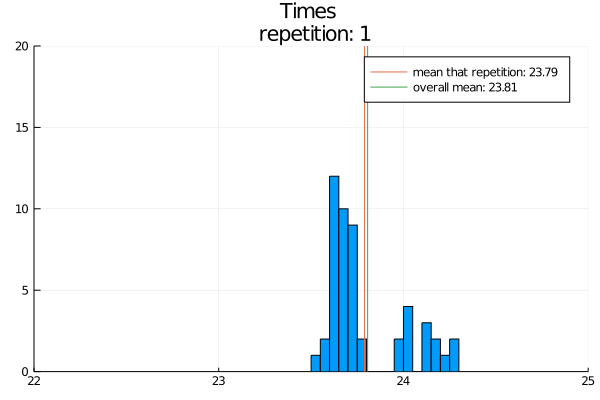

In [69]:
# Distribution of average times over repetitions
daily_times = [[parse.(Float64, split(chop(reads_1000[j].times[i]; head=1, tail=1), ", ")) for i in 1:50] for j in 1:10];
daily_mean_times = [[mean(daily_times[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_times = [mean(daily_mean_times[i]) for i in 1:10];

anim = @animate for i in 1:10
    histogram(daily_mean_times[i],nbins=15,title = "Times \n repetition: "*string(i), label="")
    xlims!(22.0, 25.0)
    ylims!(0.0, 20.0)
    vline!([repetition_mean_times[i]], label = "mean that repetition: "*string(round(repetition_mean_times[i],digits=2)))
    vline!([mean(repetition_mean_times)], label = "overall mean: "*string(round(mean(repetition_mean_times),digits=2)))
end

gif(anim, "../../gifs/time_1000cars.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/speed_1000cars.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/speed_1000cars.gif")
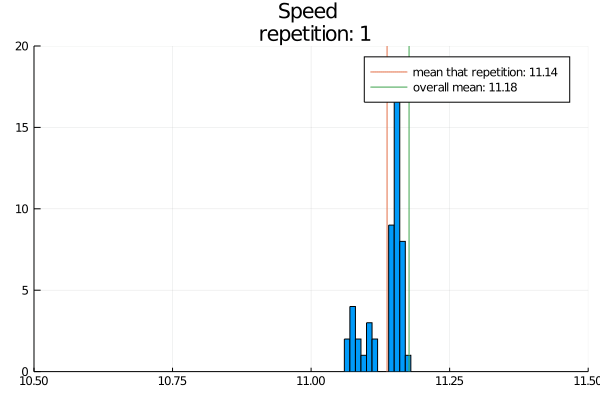

In [70]:
# Distribution of average speeds over repetitions
daily_speeds = [[parse.(Float64, split(chop(reads_1000[j].speeds[i]; head=1, tail=1), ", ")) for i in 1:50] for j in 1:10];
daily_mean_speeds = [[mean(daily_speeds[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_speeds = [mean(daily_mean_speeds[i]) for i in 1:10];

anim = @animate for i in 1:10
    histogram(daily_mean_speeds[i],nbins=15,title = "Speed \n repetition: "*string(i), label="")
    xlims!(10.5, 11.5)
    ylims!(0.0, 20.0)
    vline!([repetition_mean_speeds[i]], label = "mean that repetition: "*string(round(repetition_mean_speeds[i],digits=2)))
    vline!([mean(repetition_mean_speeds)], label = "overall mean: "*string(round(mean(repetition_mean_speeds),digits=2)))
end

gif(anim, "../../gifs/speed_1000cars.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_1000cars.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_1000cars.gif")
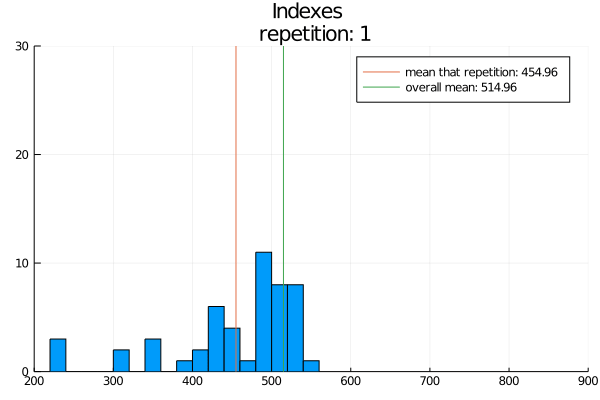

In [112]:
# Distribution of average indexes over repetitions
to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
daily_mean_indexes = [[(daily_indexes[j][i]!=[] ? mean(daily_indexes[j][i]) : NaN) for i in 1:50] for j in 1:10];
repetition_mean_indexes = [mean(filter(!isnan, daily_mean_indexes[i])) for i in 1:10];

anim = @animate for i in 1:10
    histogram(daily_mean_indexes[i],nbins=15,title = "Indexes \n repetition: "*string(i), label="")
    xlims!(200.0, 900.0)
    ylims!(0.0, 30.0)
    vline!([repetition_mean_indexes[i]], label = "mean that repetition: "*string(round(repetition_mean_indexes[i],digits=2)))
    vline!([mean(repetition_mean_indexes)], label = "overall mean: "*string(round(mean(repetition_mean_indexes),digits=2)))
end

gif(anim, "../../gifs/indexes_1000cars.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_1000cars.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/indexes_1000cars.gif")
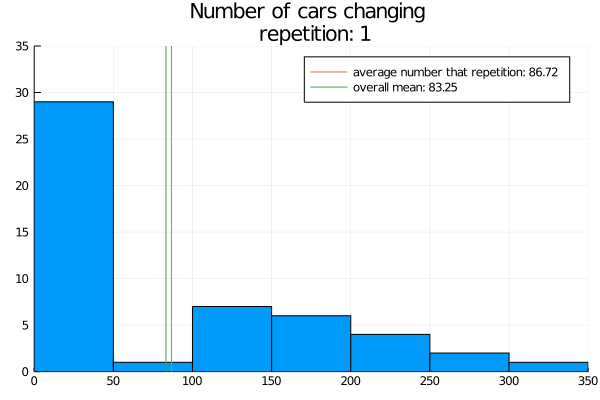

In [119]:
# Distribution of number of cars changing each repetition
to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
daily_number_indexes = [[length(daily_indexes[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_number_indexes = [mean(filter(!isnan, daily_number_indexes[i])) for i in 1:10];

anim = @animate for i in 1:10
    histogram(daily_number_indexes[i],nbins=10,title = "Number of cars changing \n repetition: "*string(i), label="")
    xlims!(0.0, 350.0)
    ylims!(0.0, 35.0)
    vline!([repetition_mean_number_indexes[i]], label = "average number that repetition: "*string(round(repetition_mean_number_indexes[i],digits=2)))
    vline!([mean(repetition_mean_number_indexes)], label = "overall mean: "*string(round(mean(repetition_mean_number_indexes),digits=2)))
end

gif(anim, "../../gifs/indexes_1000cars.gif", fps = 2)

## Results of all number of cars 1000-3000